In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
%matplotlib inline
import sklearn as sk
import os
import math
plt.rcParams['figure.figsize'] = (10,6)
from scipy.stats import norm

# Quantile or percentile technic

In [3]:
data = pd.read_csv("glass.csv")

In [11]:
max_theresold= data["Ca"].quantile(0.95)   # using quantile method identify outelier
min_theresold= data['Ca'].quantile(0.05)

In [17]:
data[data['Ca']>max_theresold] 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
103,1.52725,13.80,3.15,0.66,70.57,0.08,11.64,0.00,0.00,2
105,1.52475,11.45,0.00,1.88,72.19,0.81,13.24,0.00,0.34,2
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
107,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.00,0.24,2
110,1.52664,11.23,0.00,0.77,73.21,0.00,14.68,0.00,0.00,2
111,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.00,0.00,2
112,1.52777,12.64,0.00,0.67,72.02,0.06,14.40,0.00,0.00,2
131,1.52614,13.70,0.00,1.36,71.24,0.19,13.44,0.00,0.10,2
166,1.52151,11.03,1.71,1.56,73.44,0.58,11.62,0.00,0.00,5
170,1.52369,13.44,0.00,1.58,72.22,0.32,12.24,0.00,0.00,5


In [22]:
data[data['Ca']<min_theresold]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
70,1.51574,14.86,3.67,1.74,71.87,0.16,7.36,0.00,0.12,2
84,1.51409,14.25,3.09,2.08,72.28,1.10,7.08,0.00,0.00,2
163,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,5
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5
180,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.00,0.00,6
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6
185,1.51131,13.69,3.20,1.81,72.81,1.76,5.43,1.19,0.00,7
186,1.51838,14.32,3.26,2.22,71.25,1.46,5.79,1.63,0.00,7


In [32]:
df1=data[(data['Ca']<max_theresold)&(data['Ca']>min_theresold)] # create new dataframe after removing outlier

In [90]:
df1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [35]:
df1.shape  # shape of data after removing outlier

(192, 10)

In [36]:
data.shape # shape of data before removing outlier

(214, 10)

In [38]:
df1.sample(10) #sample of the data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
64,1.52172,13.48,3.74,0.90,72.01,0.18,9.61,0.00,0.07,1
124,1.52177,13.20,3.68,1.15,72.75,0.54,8.52,0.00,0.00,2
183,1.51969,14.56,0.00,0.56,73.48,0.00,11.22,0.00,0.00,6
127,1.52081,13.78,2.28,1.43,71.99,0.49,9.85,0.00,0.17,2
34,1.51783,12.69,3.54,1.34,72.95,0.57,8.75,0.00,0.00,1
33,1.51753,12.57,3.47,1.38,73.39,0.60,8.55,0.00,0.06,1
141,1.51851,13.20,3.63,1.07,72.83,0.57,8.41,0.09,0.17,2
59,1.51754,13.39,3.66,1.19,72.79,0.57,8.27,0.00,0.11,1
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7
200,1.51508,15.15,0.00,2.25,73.50,0.00,8.34,0.63,0.00,7


In [39]:
data.sample(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
191,1.51602,14.85,0.00,2.38,73.28,0.00,8.76,0.64,0.09,7
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
177,1.51937,13.79,2.41,1.19,72.76,0.00,9.77,0.00,0.00,6
127,1.52081,13.78,2.28,1.43,71.99,0.49,9.85,0.00,0.17,2
51,1.51926,13.20,3.33,1.28,72.36,0.60,9.14,0.00,0.11,1
126,1.51667,12.94,3.61,1.26,72.75,0.56,8.60,0.00,0.00,2
35,1.51567,13.29,3.45,1.21,72.74,0.56,8.57,0.00,0.00,1
185,1.51131,13.69,3.20,1.81,72.81,1.76,5.43,1.19,0.00,7
169,1.51994,13.27,0.00,1.76,73.03,0.47,11.32,0.00,0.00,5
132,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00,2


# standard deviation technic

In [54]:
data1= pd.read_csv('height.csv')
data1.sample(10)

,Gender,Height
1912,Male,69.781506
7890,Female,62.637879
9643,Female,58.137923
5083,Female,59.786763
4778,Male,71.687527
5011,Female,61.798879
4269,Male,69.269829
7551,Female,65.949661
9001,Female,60.340781
6417,Female,65.864519


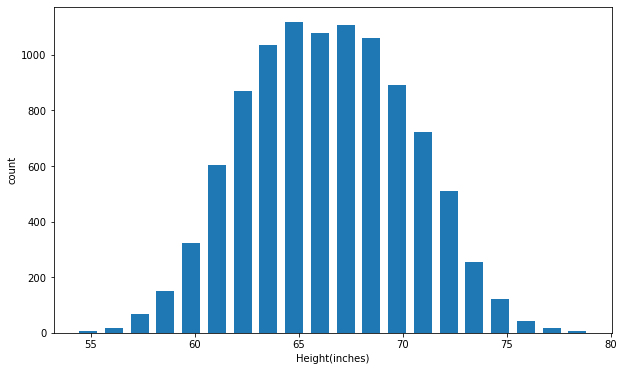

In [60]:
plt.hist(data1.Height,bins=20, rwidth=0.7)
plt.xlabel('Height(inches)')
plt.ylabel('count')
plt.show()

In [61]:
data1.min()

Gender       Female
Height    54.263133
dtype: object

In [62]:
data1.max()

Gender         Male
Height    78.998742
dtype: object

In [64]:
data1.describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


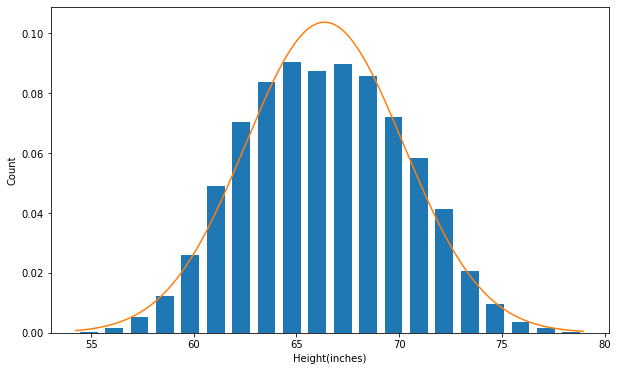

In [75]:
plt.hist(data1.Height, bins = 20,  rwidth =0.7, density = True )
plt.xlabel('Height(inches)')
plt.ylabel('Count')

rng = np.arange(data1.Height.min(), data1.Height.max(), 0.1 )
plt.plot(rng, norm.pdf(rng, data1.Height.mean(), data1.Height.std()))

In [76]:
data1.Height.mean() #mean of the data

66.3675597548656

In [77]:
data1.Height.std()  # standard deviation of data it means 66 +\- 3 = 69\63 is under the bell curv and not a outlier

3.847528120795573

In [81]:
upper_limit = data1.Height.mean()+ 3*data1.Height.std()
lower_limit = data1.Height.mean()- 3*data1.Height.std()


54.824975392478876

In [83]:
lower_limit

54.824975392478876

In [84]:
upper_limit

77.91014411725232

In [94]:
df2 = data1[(data1.Height>upper_limit) | (data1.Height<lower_limit)]  # identified outlier

In [95]:
df2

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [101]:
df3 = data1[(data1.Height<upper_limit) & (data1.Height>lower_limit)] # remove outlier

In [102]:
df3

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


# Zscore

In [110]:
data1.shape[0]- df2.shape[0]   #for how many outlier we actully removed

9993

In [113]:
data1['zscore']= (data1.Height- data1.Height.mean())/data1.Height.std()

In [117]:
data1.sample(10)     #we can identified outlier with comparing +3 or -3

,Gender,Height,zscore
2227,Male,67.497015,0.293554
8319,Female,60.164147,-1.612311
1815,Male,72.433746,1.576645
9242,Female,66.758557,0.101623
746,Male,70.958049,1.193101
8683,Female,66.193892,-0.045138
7882,Female,60.458613,-1.535778
9228,Female,63.576101,-0.725520
4795,Male,72.450721,1.581057
7592,Female,65.400273,-0.251405


In [118]:
data1[data1['zscore']>3]

,Gender,Height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [120]:
data1[data1['zscore']<-3]

,Gender,Height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [124]:
data1[(data1['zscore']>3) | (data1['zscore']<-3)]

,Gender,Height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [125]:
data1[(data1['zscore']<3) & (data1['zscore']>-3)]

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [126]:
#zscore outlier finder function
outlier=[]
def outlier_filter(df):
    
    threshold = 3
    mean = np.mean(df)
    std = np.std(df)
    
    for i in df:
        z_score = (i - mean)/std
        if np.abs(z_score) > threshold:
            outlier.append(i)
    return outlier
        

In [131]:
outlier_filter(data1['Height'])

[78.09586747,
 78.46205292,
 78.99874235,
 78.52821043,
 78.62137397,
 54.61685783,
 54.26313333]

In [140]:
quantile1, quantile3= np.percentile(data1.Height,[25,75])

In [141]:
quantile1, quantile3

(63.505620480000005, 69.17426172750001)

In [169]:
def outlierfinder( variable, q1_range, q3_range):
    q1 = variable.quantile(q1_range)
    q3 = variable.quantile(q3_range)
    IQR = q3-q1
    upper = q3 +(1.5*IQR)
    lower = q1 -(1.5*IQR)
    return IQR, upper, lower, q1, q3

In [170]:
outlierfinder(data1['Height'],0.25,0.75)

(5.668641247500005,
 77.67722359875002,
 55.00265860875,
 63.505620480000005,
 69.17426172750001)

{'whiskers': [<matplotlib.lines.Line2D at 0x2429aca4ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x2429acb04c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2429ac9aa90>],
 'medians': [<matplotlib.lines.Line2D at 0x2429acb0a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x2429acb0d30>],
 'means': []}

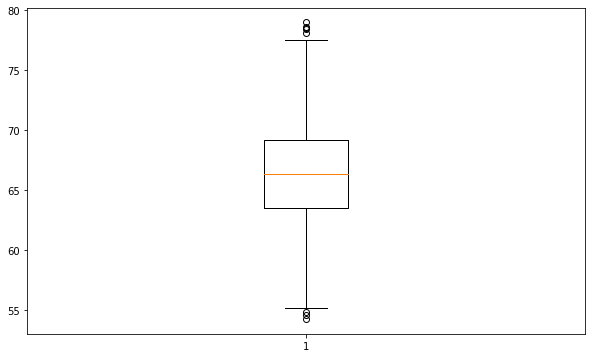

In [172]:
plt.boxplot(data1['Height'])

# import modules and package

In [ ]:
pandas  
matplotlib

# load data

In [180]:
data2 = pd.read_csv('wh.csv')

In [181]:
data2.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [182]:
data2.shape

(10000, 3)

In [183]:
data2.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


# box plot

In [188]:
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

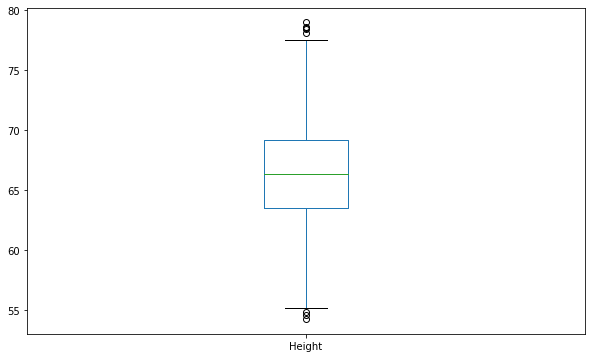

In [189]:
plot_boxplot(data2, "Height")

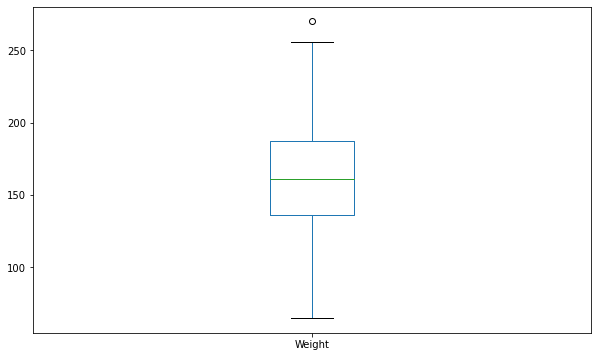

In [190]:
plot_boxplot(data2, "Weight")

# Remove outlier

In [199]:
def outliers(df, ft):
    q1 = df[ft].quantile(0.25)
    q3 = df[ft].quantile(0.75)
    IQR = q3-q1
    
    upper = q3+(1.5*IQR)
    lower = q1-(1.5*IQR)
    
    ls = df.index[(df[ft]>upper) | (df[ft]<lower)]
    
    return ls

In [201]:
index_list= []
for i in ["Height", 'Weight']:
    index_list.extend(outliers(data2, i))  

In [202]:
index_list

[994, 1317, 2014, 3285, 3757, 6624, 7294, 9285, 2014]

In [205]:
def remove_outlier(df,l):
    l = sorted(set(l))
    df = df.drop(l)
    return df
    

In [207]:
cleaned_data = remove_outlier(data2, index_list)

In [209]:
cleaned_data.shape

(9992, 3)

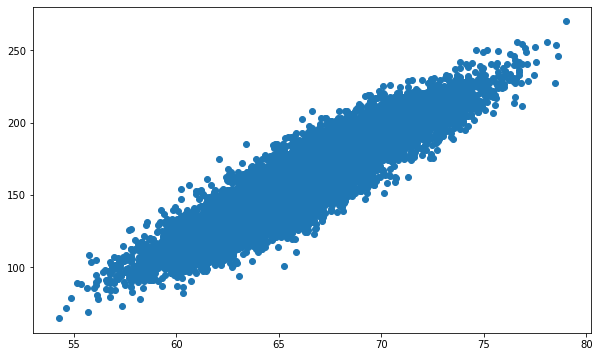

In [222]:
plt.scatter(data2['Height'],data2['Weight'])
plt.show()

<AxesSubplot:xlabel='Height', ylabel='Weight'>

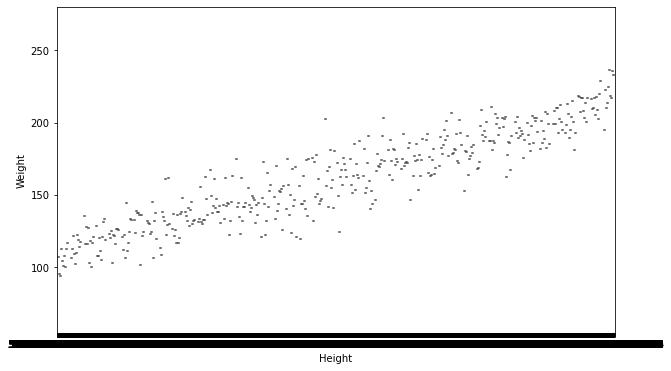

In [226]:
sns.violinplot(x ="Height",
             y ="Weight",
             data = data2)

In [233]:
# function for remove outlier from data using index
def remove_ot(df, ft):
    Q1 = df['ft'].quantile(0.10)
    Q3 = df['ft'].quantile(0.90)
    IQR = Q3 - Q1
    lower = Q1 - (1.5*IQR)
    upper = Q3 + (1.5*IQR)
    index=df['ft'][(df['ft']>upper)|(df['ft']<lower)].index
    df.drop(index,inplace=True)
    return df
    


In [ ]:
# flooring and capping of outlier

Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + whisker_width*IQR)
df['Fare']=np.where(df['Fare']>upper_whisker,upper_whisker,np.where(df['Fare']<lower_whisker,lower_whisker,df['Fare']))

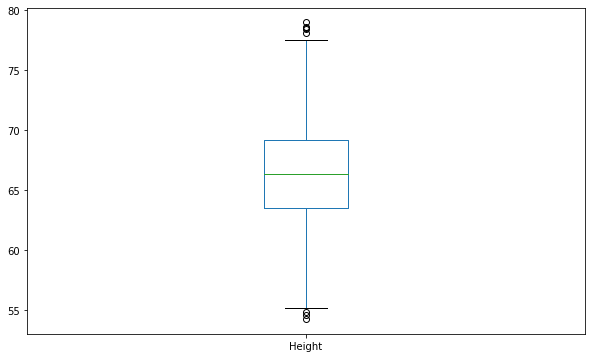

In [228]:
plot_boxplot(data2, "Height")

# code for replace outlier with median, mode, mean

In [230]:
median = float(data2['Height'].median())
data2["Height"] = np.where(data2["Height"] >76, median,data2['Height'])

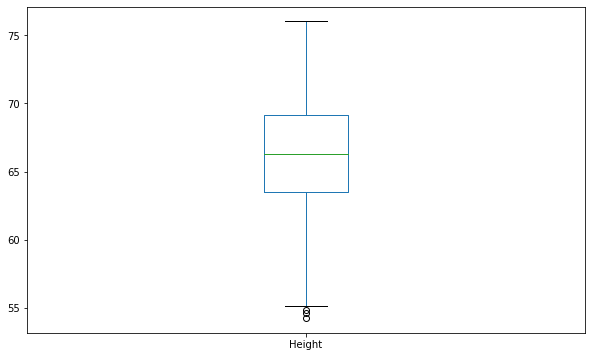

In [231]:
plot_boxplot(data2, "Height")